# Project 3 Part 1

## Topic 1) Comparing Police Districts

Which district had the most crimes in 2022? District 8 had the most crimes in 2022 (14,805 crimes).

Which had the least? District 31 had the least crimes in 2022 (15 crimes).

## Topic 4) Comparing Months

​What months have the most crime? Summer months. July has the most crimes (717,232 crimes).

What months have the least? Winter months. February has the least crimes (529,391 crimes).

Are there any individual crimes that do not follow this pattern? If so, which crimes?

Robbery & Burglary - Robbery & Burglary do not show a sharp decline in the later part of the year as all crimes in general do.

## Topic 5) Comparing Holidays

### Imports

In [1]:
# import packages
import pandas as pd
import numpy as np
import glob
# import holidays
import datetime as dt
from holidays import country_holidays
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import calendar

In [2]:
# import data
# https://sparkbyexamples.com/pandas/pandas-read-multiple-csv-files/

# Get CSV files list from a folder
path = 'Data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df  = pd.concat(df_list, ignore_index=True)

In [3]:
# preview df
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [4]:
# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# change Primary Type name to Crime
df = df.rename(columns={'Primary Type': 'Crime'})

# verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Crime                 object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


## Topic 1

In [5]:

# set Date column as index
df = df.set_index('Date')

# verify change
df.head()

,ID,Crime,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [6]:
# filter for data from 2022 only
df_22 = df.loc['2022']

# verify change
df_22.head()

,ID,Crime,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 13:00:00,12582293,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
2022-01-01 13:00:00,12607313,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2022-01-01 01:00:00,12585671,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12592889,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2022-01-01 01:00:00,12584977,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


In [7]:
# use value_counts() to get district with highest and lowest # of crimes in 2022
df_22['District'].value_counts().sort_values(ascending=False)

8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: District, dtype: int64

## Topic 4

In [8]:
# drop unnecessary columns
df_new = df[['Crime']]
df_new.head()

,Crime
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 13:00:00,BATTERY
2001-01-01 13:00:00,GAMBLING
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 01:00:00,BATTERY


In [9]:
# save date as column with no time
df_new['Date'] = df.index.date

C:\Users\eliud\AppData\Local\Temp\ipykernel_18016\1677914900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df.index.date


In [10]:
# verify change
df_new.head()

,Crime,Date
Date,,
2001-01-01 01:00:00,BATTERY,2001-01-01
2001-01-01 13:00:00,BATTERY,2001-01-01
2001-01-01 13:00:00,GAMBLING,2001-01-01
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01
2001-01-01 01:00:00,BATTERY,2001-01-01


In [11]:
# create MonthName column from index
df_new['MonthName'] = df.index.month_name()

C:\Users\eliud\AppData\Local\Temp\ipykernel_18016\1609318577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MonthName'] = df.index.month_name()


In [12]:
# rename MonthName column to Month
df_new = df_new.rename(columns={'MonthName': 'Month'})

In [13]:
# verify change
df_new.head()

,Crime,Date,Month
Date,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January
2001-01-01 13:00:00,BATTERY,2001-01-01,January
2001-01-01 13:00:00,GAMBLING,2001-01-01,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01,January
2001-01-01 01:00:00,BATTERY,2001-01-01,January


In [14]:
# create dictionary to keep track of months by number

month_lookup = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [15]:
# create dictionary to keep track of crimes by number
df_new['Crime'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

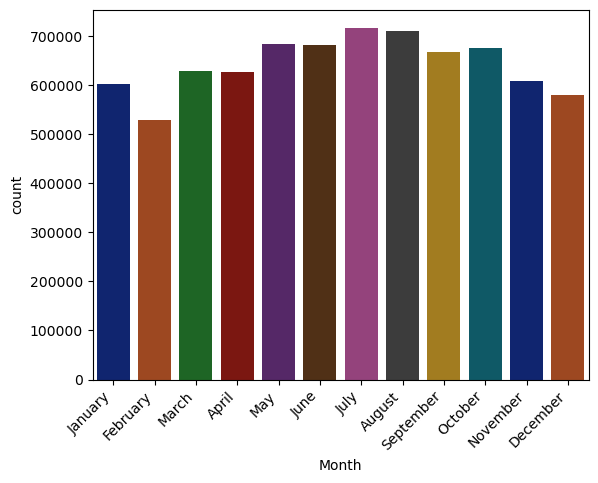

In [16]:
# make countplot by month
ax = sns.countplot(data=df_new, x='Month',palette='dark',order=month_lookup.values());

# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [17]:
# verify which month has most crimes and which month has least
df_new['Month'].value_counts()

July         717232
August       710444
May          682932
June         681739
October      676285
September    668242
March        629704
April        627175
November     608961
January      601236
December     579768
February     529391
Name: Month, dtype: int64

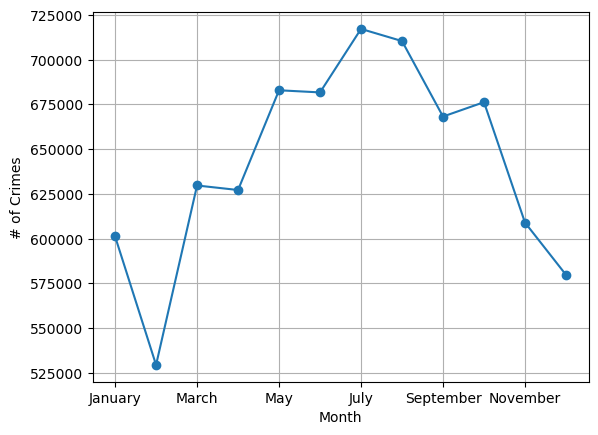

In [18]:
# view individual crimes per month to see if it follows overall monthly pattern

## save month counts
month_counts = df_new['Month'].value_counts()[month_lookup.values()]


# plot crimes per month

# how do I conver this to specific crimes per month?
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [19]:
# create list of unique crime descriptions
crime_list = df_new['Crime'].unique()

# view list
crime_list

array(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [20]:
# create empty dictionary to save new time series crime columns
CRIMES = {}

# loop through list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df_new.loc[ df_new['Crime']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size().to_frame()
   temp_res['month'] = temp_res.index.month
   
   temp_res = temp_res.groupby('month').sum()[0]
   #display(temp_res)
   # display(temp_res.head(3))
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 

crimes_df = pd.DataFrame(CRIMES)

In [21]:
# for crime in CRIMES.keys():
#     plt.plot(CRIMES[crime])
#     plt.title(crime)
#     plt.show()

In [22]:
# # loop through list of crimes
# for crime in crime_list:
#     # I. Save a temp df of just the rows that match the crime
#    temp = df_new.loc[ df_new['Crime']==crime].copy()
#     # II. Resample the temp DataFrame as Daily data (crime counts) 
#     # and keep ONLY the .size() 
#    temp_res = temp.resample("D").size()
#    temp_res['month'] = temp_res.index.month
#    temp_res = temp_res.groupby('month').sum()
#    #III. Save the temporary DataFrame in the dictionary,
#    #using the crime description as the key.
#    CRIMES[crime] = temp_res.copy() 
# CRIMES.keys()

In [23]:
# Convert Dict to df
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
month,,,,,,,,,,,,,,,,,,,,,
1,101302,360,62574,6213,123454,34818,65943,2575,30291,7934,...,3,1.0,75,8,8,62,11,15,1,2
2,93601,389,55428,3997,104948,33416,63923,1896,25387,6400,...,1,NaN,52,13,15,69,12,9,2,5
3,117869,744,71873,4617,123733,41709,69127,2112,28648,8171,...,3,NaN,88,12,9,77,12,9,1,0
4,118500,1238,75104,4445,125642,42031,62989,2134,27702,8408,...,1,NaN,51,9,13,78,11,3,1,1
5,135678,1637,79685,4877,137505,48453,63168,2404,27554,9938,...,1,NaN,72,18,22,96,12,6,0,4
6,135905,1874,78921,4785,143411,47255,59008,2512,28276,9402,...,0,NaN,65,9,22,92,14,9,0,9
7,136817,1964,83397,4539,159067,47900,61935,2676,28540,9788,...,1,NaN,72,17,13,95,17,7,1,2
8,128734,2219,81708,4595,158942,46455,64400,2596,29192,9887,...,3,NaN,52,18,25,96,18,9,1,5
9,122346,1799,75468,4414,145609,45427,60925,2449,27924,9435,...,3,NaN,68,14,19,118,17,14,1,5


In [24]:
# save new df
crimes_df.to_csv("chicago_crime_counts_01-22.csv")

In [25]:
# view null values
crimes_df.isna().sum().sum()

11

In [26]:
# fill null values with 0s
crimes_df = crimes_df.fillna(0)

# verify change
crimes_df.isna().sum()

BATTERY                              0
GAMBLING                             0
CRIMINAL DAMAGE                      0
OFFENSE INVOLVING CHILDREN           0
THEFT                                0
ASSAULT                              0
NARCOTICS                            0
CRIM SEXUAL ASSAULT                  0
DECEPTIVE PRACTICE                   0
WEAPONS VIOLATION                    0
OTHER OFFENSE                        0
MOTOR VEHICLE THEFT                  0
SEX OFFENSE                          0
BURGLARY                             0
PUBLIC PEACE VIOLATION               0
LIQUOR LAW VIOLATION                 0
ROBBERY                              0
CRIMINAL TRESPASS                    0
INTERFERENCE WITH PUBLIC OFFICER     0
HOMICIDE                             0
KIDNAPPING                           0
PROSTITUTION                         0
STALKING                             0
INTIMIDATION                         0
CRIMINAL SEXUAL ASSAULT              0
ARSON                    

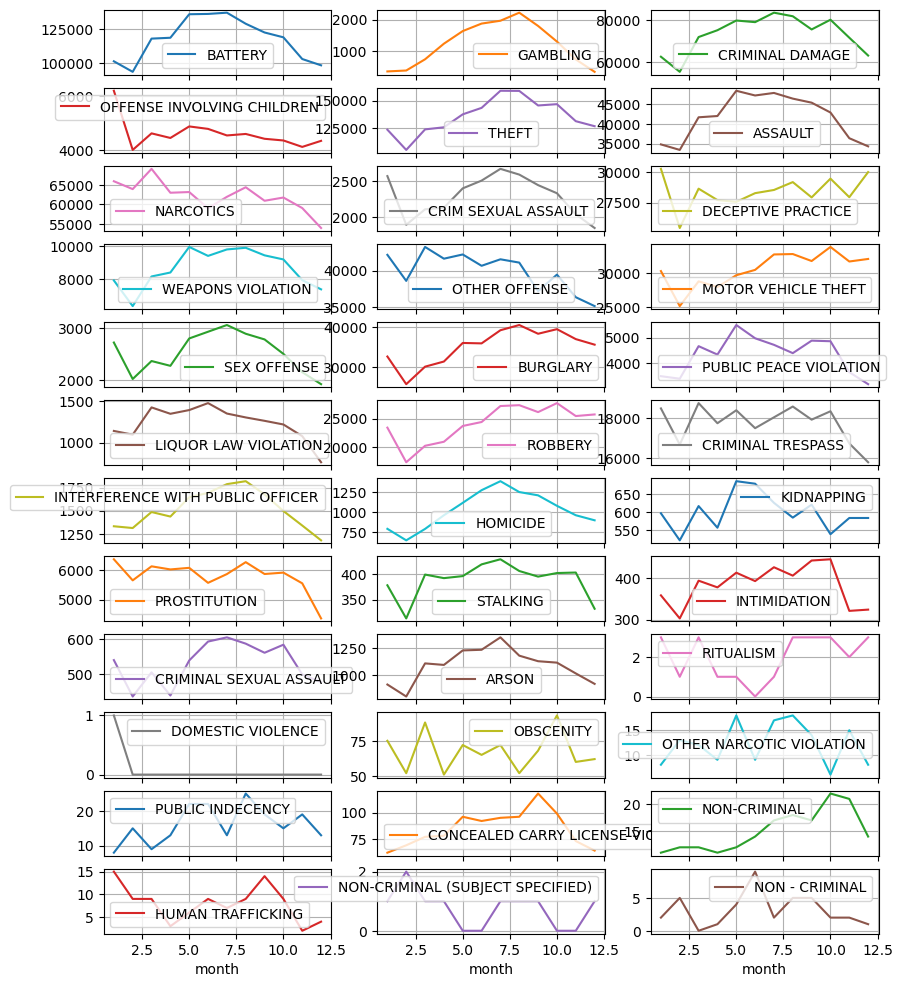

In [27]:
crimes_df.plot(subplots=True, figsize=(10,12),grid=True, layout=(12,3));
# plt.tight_layout()

In [28]:
df_monthly = df_new.copy()

In [29]:
df_monthly['month'] = df_monthly.index.month

In [30]:
df_monthly.head(3)

,Crime,Date,Month,month
Date,,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January,1
2001-01-01 13:00:00,BATTERY,2001-01-01,January,1
2001-01-01 13:00:00,GAMBLING,2001-01-01,January,1


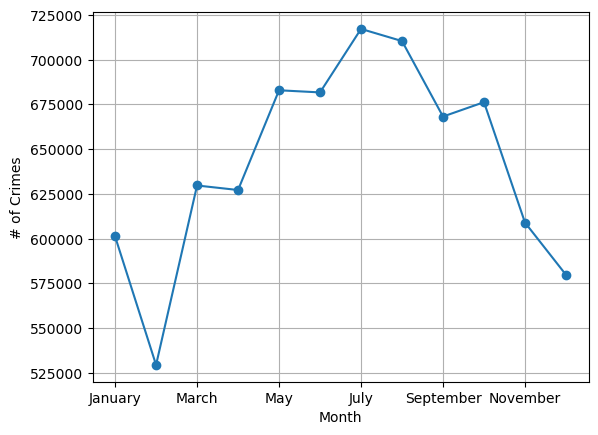

In [31]:
# view individual crimes per month to see if it follows overall monthly pattern

## save month counts
month_counts = df_new['Month'].value_counts()[month_lookup.values()]


# plot crimes per month

# how do I conver this to specific crimes per month?
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [32]:
df_monthly_crimes = df_monthly.groupby(['month', 'Crime']).size().to_frame().unstack()

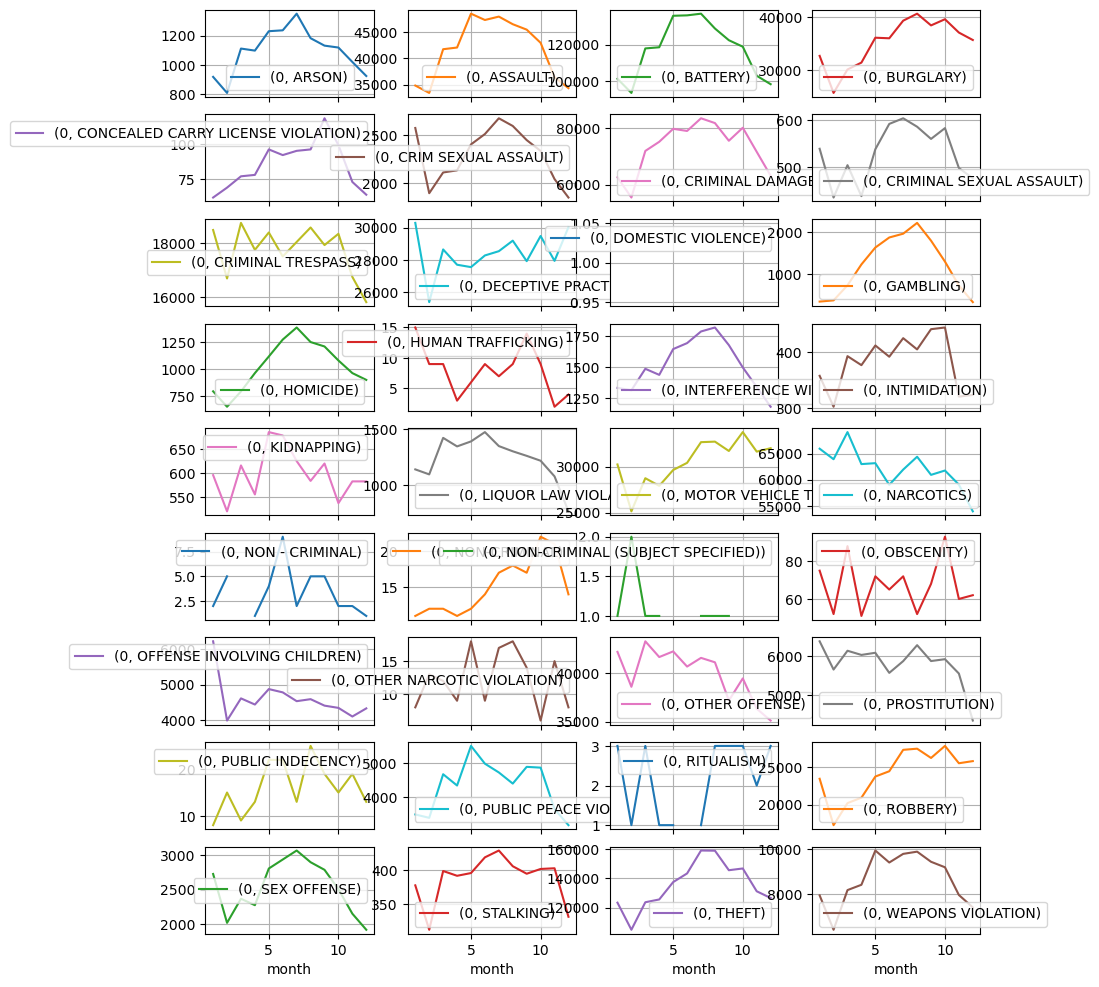

In [33]:
df_monthly_crimes.plot(subplots=True, figsize=(10,12),grid=True, layout=(9,4));

## Topic 5) Comparing Holidays

What are the top 3 holidays with the largest number of crime?

For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [34]:
## making a date range that covers full dataset
all_days = pd.date_range(df_new["Date"].min(), df_new["Date"].max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [35]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [36]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 00:00:00


"New Year's Day"

In [37]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [38]:
# For a specific subdivisions (e.g. state or province):
il_holidays = country_holidays('US', subdiv='IL')
il_holidays

holidays.country_holidays('US', subdiv='IL')

In [39]:
## Saving both holiday types as columns
df_new["US Holiday"] = [us_holidays.get(day) for day in df_new['Date']]
df_new['IL Holiday'] = [il_holidays.get(day) for day in df_new['Date']]
df_new.head()

,Crime,Date,Month,US Holiday,IL Holiday
Date,,,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 13:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 13:00:00,GAMBLING,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 01:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day


In [40]:
## US Holidays
df_new['US Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Christmas Day (Observed)                            4929
New Year's Day (Observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

In [41]:
# use value_counts() to find top 3 IL holidays with crime
df_new['IL Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Casimir Pulaski Day                                19128
Lincoln's Birthday                                 18165
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Election Day                                        6342
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Lincoln's Birthday (Observed)                       5156
Christmas Day (Observed)                            4929
New Year's Day (Observed)      

In [42]:
holiday_crimes_df = df_new.groupby('IL Holiday')['Crime'].size().sort_values(ascending = False)
holiday_crimes_df = holiday_crimes_df.to_frame('No. of Crimes')
holiday_crimes_df

,No. of Crimes
IL Holiday,
New Year's Day,32725
Independence Day,22672
Labor Day,22164
Memorial Day,21125
Columbus Day,20920
Veterans Day,20418
Casimir Pulaski Day,19128
Lincoln's Birthday,18165
Martin Luther King Jr. Day,17916


In [43]:
# top 3 holidays with crime
holiday_crimes_df_index = holiday_crimes_df.index[0:3]
holiday_crimes_df_index

Index(['New Year's Day', 'Independence Day', 'Labor Day'], dtype='object', name='IL Holiday')

In [44]:
# get only days in df where crimes occurred are holidays
holiday_is_in = df_new['IL Holiday'].isin(holiday_crimes_df_index)
df_new[holiday_is_in]

,Crime,Date,Month,US Holiday,IL Holiday
Date,,,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 13:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 13:00:00,GAMBLING,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 01:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
...,...,...,...,...,...
2022-09-05 12:45:00,BATTERY,2022-09-05,September,Labor Day,Labor Day
2022-09-05 12:50:00,MOTOR VEHICLE THEFT,2022-09-05,September,Labor Day,Labor Day
2022-09-05 00:53:00,THEFT,2022-09-05,September,Labor Day,Labor Day


In [45]:
# drop Date column to avoid ambiguity error
#df_new = df_new.drop(['Date'], axis=1)

# verify change
df_new.head()

,Crime,Date,Month,US Holiday,IL Holiday
Date,,,,,
2001-01-01 01:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 13:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 13:00:00,GAMBLING,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001-01-01,January,New Year's Day,New Year's Day
2001-01-01 01:00:00,BATTERY,2001-01-01,January,New Year's Day,New Year's Day


In [46]:
# drop other unnecessary columns
#df_new = df_new.drop(['US Holiday', 'MD Holiday'], axis=1)

# nyd filter
nyd = df_new['IL Holiday'] == holiday_crimes_df_index[0]
# july 4 filter
fourth = df_new['IL Holiday'] == holiday_crimes_df_index[1]
# labor day filter
labor = df_new['IL Holiday'] == holiday_crimes_df_index[2]

# see top 5 crimes on top 3 holidays: NYD, July 4, Labor Day
df_new[nyd]['Crime'].value_counts().head()

THEFT                         6845
BATTERY                       6043
CRIMINAL DAMAGE               3236
DECEPTIVE PRACTICE            2934
OFFENSE INVOLVING CHILDREN    2380
Name: Crime, dtype: int64

In [47]:
df_new[fourth]['Crime'].value_counts().head()

BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
ASSAULT            1547
NARCOTICS          1522
Name: Crime, dtype: int64

In [48]:
df_new[labor]['Crime'].value_counts().head()

BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
NARCOTICS          2078
ASSAULT            1525
Name: Crime, dtype: int64

# Project 3 Part 2

## Import Functions

In [86]:
# plot acf pacf custom function
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [88]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

Transform the data to obtain a time series of the crime count per month using .size().

In [53]:
# use groupby and resample('M') to get crime count per month
df_monthly = df.groupby('Crime').resample('M').size().unstack(0)

# preview data
df_monthly.head()

Crime,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,162.0,3966.0,3.0,1192.0,1398.0,...,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1163.0,...,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4617.0,4.0,1141.0,1313.0,...,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,...,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,155.0,4757.0,2.0,1067.0,1261.0,...,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0


Check for and address null values.

In [59]:
# view null values
df_monthly.isna().sum()

Crime
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                             0
CONCEALED CARRY LICENSE VIOLATION    0
CRIM SEXUAL ASSAULT                  0
CRIMINAL DAMAGE                      0
CRIMINAL SEXUAL ASSAULT              0
CRIMINAL TRESPASS                    0
DECEPTIVE PRACTICE                   0
DOMESTIC VIOLENCE                    0
GAMBLING                             0
HOMICIDE                             0
HUMAN TRAFFICKING                    0
INTERFERENCE WITH PUBLIC OFFICER     0
INTIMIDATION                         0
KIDNAPPING                           0
LIQUOR LAW VIOLATION                 0
MOTOR VEHICLE THEFT                  0
NARCOTICS                            0
NON - CRIMINAL                       0
NON-CRIMINAL                         0
NON-CRIMINAL (SUBJECT SPECIFIED)     0
OBSCENITY                            0
OFFENSE INVOLVING CHILDREN           0
OTHER NARCOTIC VIOL

In [57]:
# fill missing values with 0
df_monthly = df_monthly.fillna(0)

In [61]:
# verify changes
df_monthly.isna().sum().sum()

0

Decompose the Time series to detect seasonality and decide whether to use a seasonal model or not ( ASSAULT)

In [66]:
# create assault ts from ASSAULT column in df_monthly
ts_assault = df_monthly['ASSAULT']

# preview data
ts_assault.head()

Date
2001-01-31    2123.0
2001-02-28    2029.0
2001-03-31    2824.0
2001-04-30    2746.0
2001-05-31    2903.0
Name: ASSAULT, dtype: float64

In [70]:
# seasonal decomposition

# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

# apply seasonal_decompose function
assault_decomp = tsa.seasonal_decompose(ts_assault)
assault_decomp

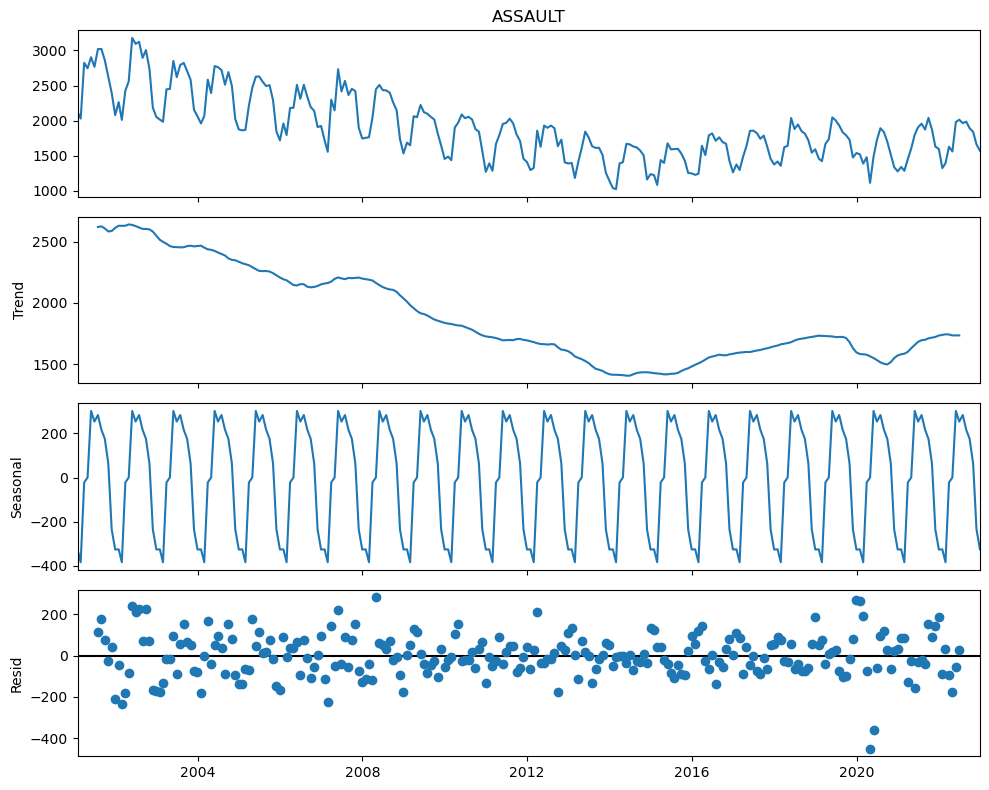

In [73]:
# use .plot() method to visualize results
assault_fig = assault_decomp.plot()

# adjust size of plots
assault_fig.set_size_inches(10,8)
assault_fig.tight_layout()

In [76]:
# How big is the seasonal component
seasonal_delta = assault_decomp.seasonal.max() - assault_decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts_assault.max()-ts_assault.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 684.8888888888889 which is ~31.75% of the variation in time series.


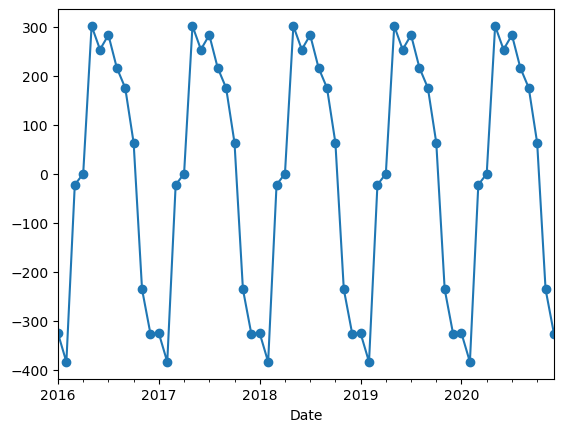

In [79]:
# zoom in on seasonality
# Narrow down the date range of the plot
seasonal = assault_decomp.seasonal
ax = seasonal.loc['2016': '2020'].plot(marker = 'o')

In [ ]:
# 12 points between peaks indicates a seasonal period of 12 months

Determine if nonseasonal and/or seasonal differencing is required

In [82]:
# import ndiffs and nsdiffs
from pmdarima.arima.utils import ndiffs, nsdiffs

In [83]:
# determine d
d = ndiffs(ts_assault)
print (f'd = {d}')

d = 1


In [84]:
# Determine D
D = nsdiffs(ts_assault, m =12)
print(f'D = {D}')

D = 0


In [87]:
# apply diff to achieve stationarity
ts_assault_diff = ts_assault.diff().dropna()

In [89]:
# verify stationarity with ad fuller
get_adfuller_results(ts_assault_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.936162,14,248,0.001784,0.05,True


Use the ACF and PACF plots of stationarity data to estimate initial orders

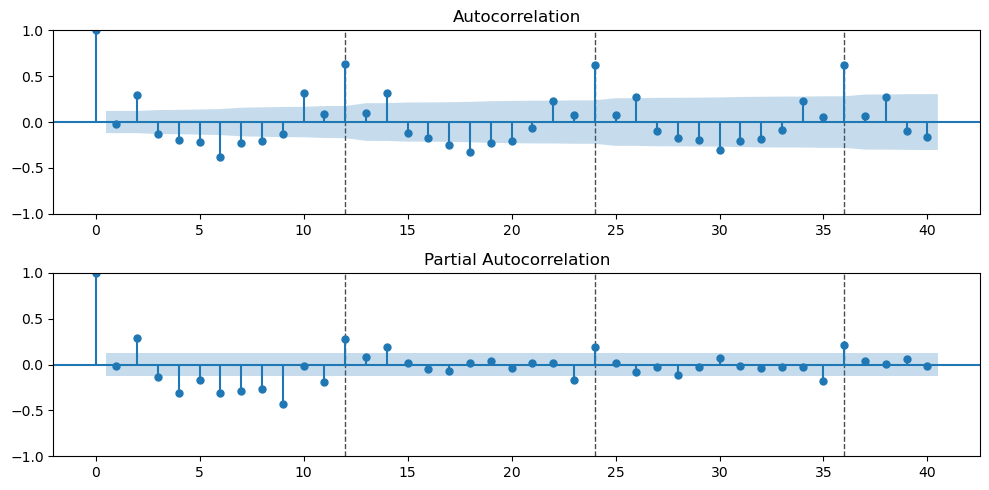

In [90]:
# We can use our function to highlight the seasonal lags by adding the arguments
plot_acf_pacf(ts_assault_diff, annotate_seas=True, m = 12);

Split the time series into training and test data (Remember we want to predict 6 months)

Fit a manual ARIMA/SARIMA model based on the orders determined during your exploration.

Make forecasts with your model.

Plot the forecasts versus the test data

Obtain metrics for evaluation

Tune with pmdarima's auto_arima

Fit a model on training data with the best parameters from auto_arima

Obtain metrics for evaluation

Make forecasts with the auto_arima model

Plot the forecasts versus the test data

Select the final model and justify your choice. (Which metrics or diagnostics support your choice?)

Make true future forecasts using the entire dataset (for dates beyond the entire ts)

For each of your two selected crimes, answer the following questions in a markdown cell:

Calculate the predicted net change in the number (raw counts) of this type of crime from the beginning of the forecast to the end.

Convert the raw delta into a percent change.

Final Evaluation:

After completing both models and getting the forecasts for both crimes for 6 months into the future (beyond the data), answer the following questions in a Markdown cell:

Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?

Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?

Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?


Final Recommendations

What recommendation would you make to the stakeholders?

Include reporting-quality visual(s) to support your recommendation.